In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Ross_Extent = pd.read_excel(filepath, sheet_name='Ross-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Ross_Extent)
fp.date_time(Ross_Extent)

,Extent,Date
0,1040455.516,1979-01-01
1,239334.118,1979-02-01
2,557365.154,1979-03-01
3,2054855.924,1979-04-01
4,2973925.625,1979-05-01
...,...,...
533,3137598.938,2023-06-01
534,3201783.453,2023-07-01
535,2973294.266,2023-08-01
536,3354839.711,2023-09-01


In [5]:
scaler = MinMaxScaler()
Ross_Extent['Extent'] = scaler.fit_transform(Ross_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 3
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Ross_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((524, 12, 1), (524,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Ross_model_LT3/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
45/53 [========================>.....] - ETA: 0s - loss: 0.4249 - root_mean_squared_error: 0.6519

INFO:tensorflow:Assets written to: Ross_model_LT3\assets


INFO:tensorflow:Assets written to: Ross_model_LT3\assets


53/53 [==============================] - 8s 100ms/step - loss: 0.4137 - root_mean_squared_error: 0.6432 - val_loss: 0.3293 - val_root_mean_squared_error: 0.5739
Epoch 2/50
44/53 [=======================>......] - ETA: 0s - loss: 0.3106 - root_mean_squared_error: 0.5573

INFO:tensorflow:Assets written to: Ross_model_LT3\assets


INFO:tensorflow:Assets written to: Ross_model_LT3\assets


53/53 [==============================] - 5s 91ms/step - loss: 0.3071 - root_mean_squared_error: 0.5542 - val_loss: 0.2857 - val_root_mean_squared_error: 0.5345
Epoch 3/50
42/53 [======================>.......] - ETA: 0s - loss: 0.2545 - root_mean_squared_error: 0.5044

INFO:tensorflow:Assets written to: Ross_model_LT3\assets


INFO:tensorflow:Assets written to: Ross_model_LT3\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.2544 - root_mean_squared_error: 0.5044 - val_loss: 0.2309 - val_root_mean_squared_error: 0.4805
Epoch 4/50
48/53 [==========================>...] - ETA: 0s - loss: 0.2075 - root_mean_squared_error: 0.4556

INFO:tensorflow:Assets written to: Ross_model_LT3\assets


INFO:tensorflow:Assets written to: Ross_model_LT3\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.2100 - root_mean_squared_error: 0.4583 - val_loss: 0.1881 - val_root_mean_squared_error: 0.4337
Epoch 5/50
51/53 [===========================>..] - ETA: 0s - loss: 0.1752 - root_mean_squared_error: 0.4186

INFO:tensorflow:Assets written to: Ross_model_LT3\assets


INFO:tensorflow:Assets written to: Ross_model_LT3\assets


53/53 [==============================] - 4s 80ms/step - loss: 0.1748 - root_mean_squared_error: 0.4181 - val_loss: 0.1458 - val_root_mean_squared_error: 0.3818
Epoch 6/50
43/53 [=======================>......] - ETA: 0s - loss: 0.1452 - root_mean_squared_error: 0.3810

INFO:tensorflow:Assets written to: Ross_model_LT3\assets


INFO:tensorflow:Assets written to: Ross_model_LT3\assets


53/53 [==============================] - 4s 72ms/step - loss: 0.1377 - root_mean_squared_error: 0.3711 - val_loss: 0.1177 - val_root_mean_squared_error: 0.3430
Epoch 7/50
45/53 [========================>.....] - ETA: 0s - loss: 0.1070 - root_mean_squared_error: 0.3270

INFO:tensorflow:Assets written to: Ross_model_LT3\assets


INFO:tensorflow:Assets written to: Ross_model_LT3\assets


53/53 [==============================] - 4s 71ms/step - loss: 0.1057 - root_mean_squared_error: 0.3252 - val_loss: 0.0919 - val_root_mean_squared_error: 0.3031
Epoch 8/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0853 - root_mean_squared_error: 0.2921

INFO:tensorflow:Assets written to: Ross_model_LT3\assets


INFO:tensorflow:Assets written to: Ross_model_LT3\assets


53/53 [==============================] - 3s 57ms/step - loss: 0.0849 - root_mean_squared_error: 0.2914 - val_loss: 0.0684 - val_root_mean_squared_error: 0.2615
Epoch 9/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0665 - root_mean_squared_error: 0.2578

INFO:tensorflow:Assets written to: Ross_model_LT3\assets


INFO:tensorflow:Assets written to: Ross_model_LT3\assets


53/53 [==============================] - 3s 59ms/step - loss: 0.0642 - root_mean_squared_error: 0.2534 - val_loss: 0.0492 - val_root_mean_squared_error: 0.2217
Epoch 10/50
53/53 [==============================] - ETA: 0s - loss: 0.0479 - root_mean_squared_error: 0.2189

INFO:tensorflow:Assets written to: Ross_model_LT3\assets


INFO:tensorflow:Assets written to: Ross_model_LT3\assets


53/53 [==============================] - 3s 64ms/step - loss: 0.0479 - root_mean_squared_error: 0.2189 - val_loss: 0.0364 - val_root_mean_squared_error: 0.1908
Epoch 11/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0368 - root_mean_squared_error: 0.1918

INFO:tensorflow:Assets written to: Ross_model_LT3\assets


INFO:tensorflow:Assets written to: Ross_model_LT3\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0352 - root_mean_squared_error: 0.1875 - val_loss: 0.0265 - val_root_mean_squared_error: 0.1627
Epoch 12/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0295 - root_mean_squared_error: 0.1718

INFO:tensorflow:Assets written to: Ross_model_LT3\assets


INFO:tensorflow:Assets written to: Ross_model_LT3\assets


53/53 [==============================] - 4s 80ms/step - loss: 0.0292 - root_mean_squared_error: 0.1710 - val_loss: 0.0193 - val_root_mean_squared_error: 0.1391
Epoch 13/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0215 - root_mean_squared_error: 0.1465

INFO:tensorflow:Assets written to: Ross_model_LT3\assets


INFO:tensorflow:Assets written to: Ross_model_LT3\assets


53/53 [==============================] - 4s 76ms/step - loss: 0.0209 - root_mean_squared_error: 0.1445 - val_loss: 0.0173 - val_root_mean_squared_error: 0.1316
Epoch 14/50
53/53 [==============================] - ETA: 0s - loss: 0.0199 - root_mean_squared_error: 0.1410

INFO:tensorflow:Assets written to: Ross_model_LT3\assets


INFO:tensorflow:Assets written to: Ross_model_LT3\assets


53/53 [==============================] - 4s 76ms/step - loss: 0.0199 - root_mean_squared_error: 0.1410 - val_loss: 0.0136 - val_root_mean_squared_error: 0.1166
Epoch 15/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0181 - root_mean_squared_error: 0.1346

INFO:tensorflow:Assets written to: Ross_model_LT3\assets


INFO:tensorflow:Assets written to: Ross_model_LT3\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0181 - root_mean_squared_error: 0.1344 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1088
Epoch 16/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0170 - root_mean_squared_error: 0.1302 - val_loss: 0.0183 - val_root_mean_squared_error: 0.1354
Epoch 17/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0137 - root_mean_squared_error: 0.1169 - val_loss: 0.0168 - val_root_mean_squared_error: 0.1297
Epoch 18/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0127 - root_mean_squared_error: 0.1129 - val_loss: 0.0133 - val_root_mean_squared_error: 0.1154
Epoch 19/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0133 - root_mean_squared_error: 0.1154 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1126
Epoch 20/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0141 - root_mean_squared_error: 0.1189 - val_loss: 0.0132 - val_root_mean_squared

INFO:tensorflow:Assets written to: Ross_model_LT3\assets


INFO:tensorflow:Assets written to: Ross_model_LT3\assets


53/53 [==============================] - 4s 76ms/step - loss: 0.0136 - root_mean_squared_error: 0.1165 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0940
Epoch 24/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0151 - root_mean_squared_error: 0.1228

INFO:tensorflow:Assets written to: Ross_model_LT3\assets


INFO:tensorflow:Assets written to: Ross_model_LT3\assets


53/53 [==============================] - 4s 80ms/step - loss: 0.0152 - root_mean_squared_error: 0.1233 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0935
Epoch 25/50
53/53 [==============================] - ETA: 0s - loss: 0.0121 - root_mean_squared_error: 0.1100

INFO:tensorflow:Assets written to: Ross_model_LT3\assets


INFO:tensorflow:Assets written to: Ross_model_LT3\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.0121 - root_mean_squared_error: 0.1100 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0912
Epoch 26/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0150 - root_mean_squared_error: 0.1224 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0953
Epoch 27/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0126 - root_mean_squared_error: 0.1121 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0955
Epoch 28/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0113 - root_mean_squared_error: 0.1063 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0963
Epoch 29/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0129 - root_mean_squared_error: 0.1134 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1132
Epoch 30/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0111 - root_mean_squared_error: 0.1055 - val_loss: 0.0091 - val_root_mean_squared

INFO:tensorflow:Assets written to: Ross_model_LT3\assets


INFO:tensorflow:Assets written to: Ross_model_LT3\assets


53/53 [==============================] - 4s 75ms/step - loss: 0.0114 - root_mean_squared_error: 0.1066 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0906
Epoch 33/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0131 - root_mean_squared_error: 0.1143 - val_loss: 0.0176 - val_root_mean_squared_error: 0.1326
Epoch 34/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0115 - root_mean_squared_error: 0.1072

INFO:tensorflow:Assets written to: Ross_model_LT3\assets


INFO:tensorflow:Assets written to: Ross_model_LT3\assets


53/53 [==============================] - 4s 78ms/step - loss: 0.0117 - root_mean_squared_error: 0.1084 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0887
Epoch 35/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0120 - root_mean_squared_error: 0.1098 - val_loss: 0.0239 - val_root_mean_squared_error: 0.1547
Epoch 36/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0146 - root_mean_squared_error: 0.1207 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0951
Epoch 37/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0118 - root_mean_squared_error: 0.1087 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1057
Epoch 38/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0131 - root_mean_squared_error: 0.1145 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0916
Epoch 39/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0135 - root_mean_squared_error: 0.1160 - val_loss: 0.0157 - val_root_mean_squared

INFO:tensorflow:Assets written to: Ross_model_LT3\assets


INFO:tensorflow:Assets written to: Ross_model_LT3\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.0137 - root_mean_squared_error: 0.1169 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0866
Epoch 47/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0120 - root_mean_squared_error: 0.1094 - val_loss: 0.0124 - val_root_mean_squared_error: 0.1115
Epoch 48/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0110 - root_mean_squared_error: 0.1051 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1105
Epoch 49/50
53/53 [==============================] - ETA: 0s - loss: 0.0123 - root_mean_squared_error: 0.1111

INFO:tensorflow:Assets written to: Ross_model_LT3\assets


INFO:tensorflow:Assets written to: Ross_model_LT3\assets


53/53 [==============================] - 4s 81ms/step - loss: 0.0123 - root_mean_squared_error: 0.1111 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0844
Epoch 50/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0110 - root_mean_squared_error: 0.1048 - val_loss: 0.0105 - val_root_mean_squared_error: 0.1023


In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.7150004267692567 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

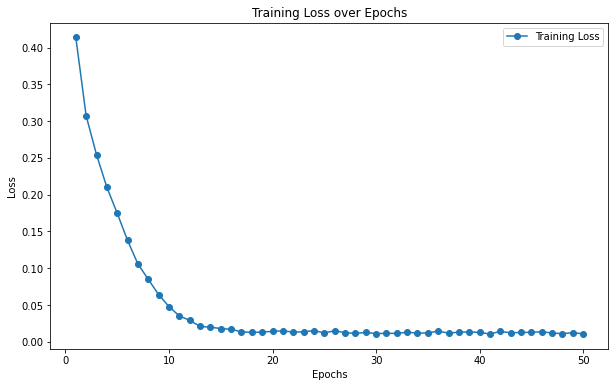

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

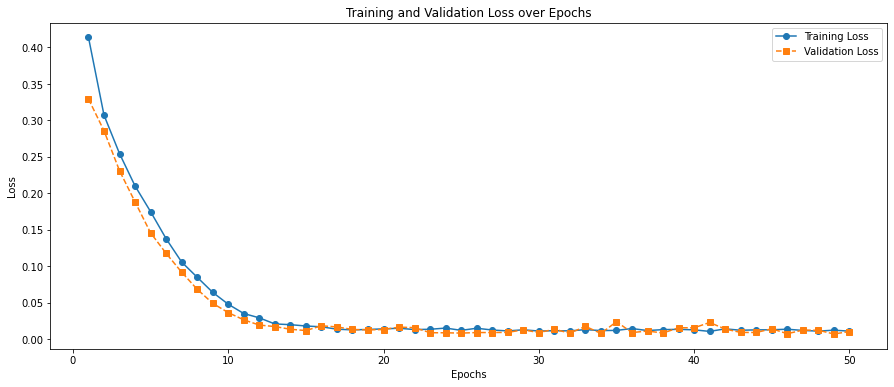

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Ross_model_LT3/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.09288422421251095
MAE : 0.06697495452824362


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,3.657212e+06,3656196.531
1,3.926997e+06,3794128.369
2,4.025731e+06,3885746.442
3,3.971489e+06,3909211.179
4,3.598022e+06,3499167.351
5,2.348020e+06,2715890.297
6,1.161741e+06,1053272.694
7,4.589764e+05,368862.123
8,7.350481e+05,979418.298
9,1.967586e+06,2086269.569


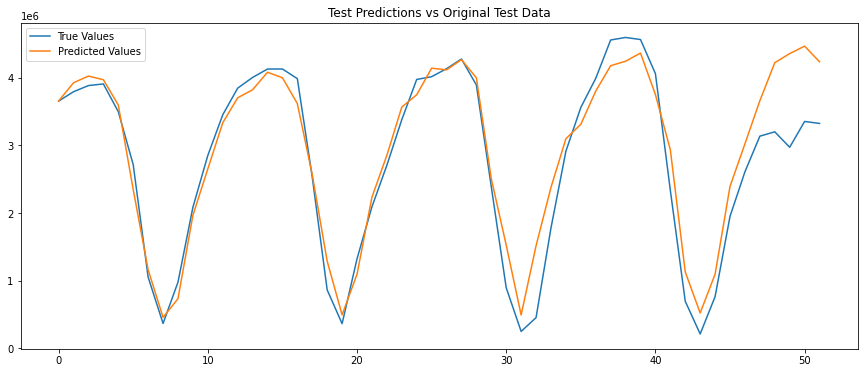

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

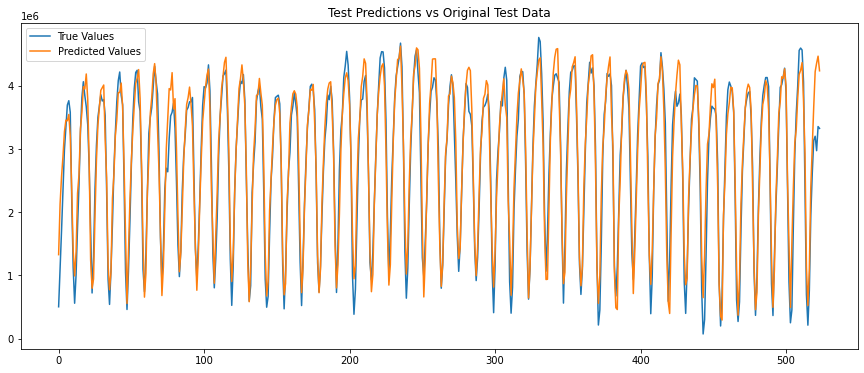

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()